In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np

In [24]:
#!pip install plot_confusion_matrix

In [25]:

# Import the datasets separately
red_wine = pd.read_csv('C:/Users/jasmi/Projects/Wine-Wizardry/wine-quality Red.csv')


# Display the first few rows of the combined data
red_wine.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [26]:
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [27]:
red_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [28]:
# Create the labels set `y` and features DataFrame `X`
y = red_wine["quality"]
X = red_wine.drop(columns="quality")

In [29]:
#red_encoded = pd.get_dummies(wine_data, columns=['type'])

In [30]:
# Check the balance of the labels variable (`y`) by using the `value_counts` function.
y.value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [31]:
# # Assuming the 'quality' column contains wine quality levels

# # Define a function to map quality levels to two classes
# def classify_quality(quality):
#     if quality >= 3 and quality <= 5:
#         return 0
#     elif quality >= 6 and quality <= 8:
#         return 1
#     else:
#         return None  # If any other value exists

# # Apply the function to create a new column 'quality_class'
# red_wine['quality_class'] = red_wine['quality'].apply(classify_quality)

# # Check the first few rows to verify the transformation
# print(red_wine[['quality', 'quality_class']].head(10))

In [32]:
y.value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [33]:
# y = red_wine["quality_class"]
# X = red_wine.drop(columns=["quality", "quality_class"])

In [34]:
# Split the data into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [35]:
from sklearn.preprocessing import StandardScaler

# Create the StandardScaler instance
red_scaled= StandardScaler()

In [36]:
# Fit the Standard Scaler with the training data
X_scaler = red_scaled.fit(X_train)

In [37]:
# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Logistic Regression

In [38]:
# Train a Logistic Regression model and print the model score
from sklearn.linear_model import LogisticRegression


lr_model = LogisticRegression(random_state=1)

lr_model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=1)

In [39]:
# Make and save testing predictions with the saved logistic regression model using the test data
logistic_testing_predictions = lr_model.predict(X_test_scaled)

# Review the predictions
logistic_testing_predictions

array([5, 6, 7, 5, 6, 5, 6, 6, 5, 5, 6, 6, 7, 5, 5, 6, 5, 5, 5, 5, 5, 5,
       6, 5, 5, 7, 5, 6, 5, 6, 6, 6, 6, 5, 5, 8, 5, 6, 6, 6, 5, 6, 5, 6,
       5, 5, 7, 5, 6, 6, 5, 6, 6, 5, 6, 5, 5, 6, 5, 6, 5, 6, 6, 5, 6, 5,
       5, 6, 5, 7, 5, 6, 5, 5, 6, 6, 5, 6, 6, 6, 7, 5, 5, 5, 5, 6, 6, 6,
       6, 6, 5, 5, 5, 6, 6, 6, 5, 5, 5, 6, 5, 5, 6, 5, 6, 6, 5, 6, 5, 5,
       5, 5, 5, 5, 7, 6, 6, 8, 7, 6, 6, 5, 7, 5, 6, 5, 7, 6, 6, 6, 5, 5,
       6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 5, 6, 6, 6, 5, 5, 5, 6, 5,
       7, 6, 5, 5, 5, 5, 6, 5, 5, 5, 6, 5, 6, 5, 5, 6, 6, 5, 5, 6, 5, 7,
       5, 5, 5, 6, 6, 5, 6, 6, 6, 6, 6, 5, 6, 5, 5, 6, 5, 5, 5, 6, 5, 5,
       6, 5, 6, 5, 6, 6, 6, 5, 6, 5, 5, 6, 6, 6, 7, 5, 5, 6, 7, 6, 6, 5,
       6, 6, 5, 6, 5, 6, 6, 6, 6, 5, 6, 5, 7, 6, 6, 6, 5, 6, 7, 7, 6, 6,
       5, 5, 6, 6, 5, 6, 7, 5, 6, 5, 6, 5, 5, 6, 7, 6, 6, 5, 6, 5, 7, 7,
       6, 5, 5, 5, 6, 6, 5, 6, 5, 5, 6, 5, 6, 5, 6, 7, 6, 5, 5, 6, 6, 5,
       5, 5, 6, 5, 5, 6, 7, 5, 5, 7, 6, 5, 5, 5, 6,

In [40]:
# Calculate the accuracy score by evaluating `y_test` vs. `testing_predictions`.
accuracy_score(y_test, logistic_testing_predictions)


0.57

<Figure size 640x480 with 0 Axes>

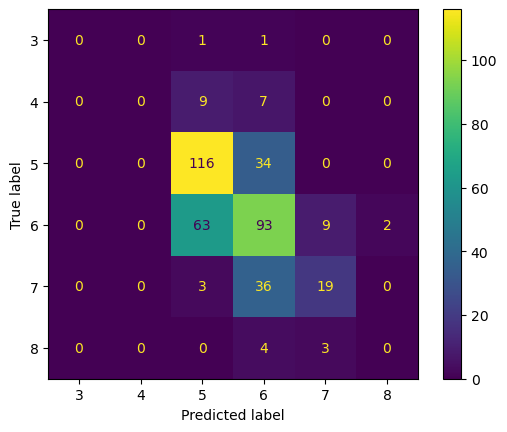

In [41]:
plt.figure()
cm = confusion_matrix(y_test, logistic_testing_predictions)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_model.classes_)
cm_display.plot()
plt.show()
